In [77]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

## data loading

In [78]:
path_train = os.path.join("data_set","train.csv")
df_train = pd.read_csv(path_train)

path_test = os.path.join("data_set","test.csv")
df_test = pd.read_csv(path_test)


In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data visualization

<Axes: xlabel='SalePrice', ylabel='Count'>

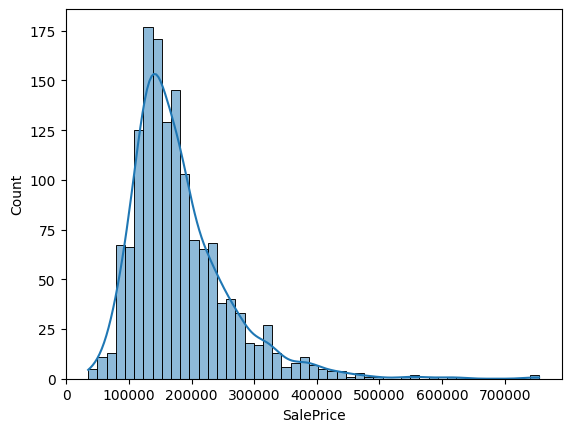

In [80]:
sns.histplot(data = df_train['SalePrice'],kde = True)

Respone data is skewed to the right. Log transformation is used to address skweness.

<Axes: xlabel='LogSalePrice', ylabel='Count'>

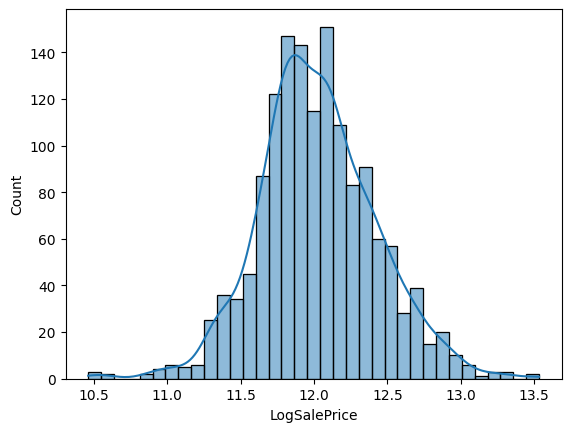

In [81]:
df_train['LogSalePrice'] = np.log(df_train['SalePrice'])
sns.histplot(data = df_train['LogSalePrice'],kde = True)

## Imputation

In [82]:
# how may missing data are here in train data
null_count = df_train.isnull().sum().sort_values(ascending=False)
(null_count[null_count>0] / 1460) *100 # percentage of null for a feature

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [83]:
# how may missing data are here in test data
null_count = df_test.isnull().sum().sort_values(ascending=False)
(null_count[null_count>0] / 1460) *100 # percentage of null for a feature

PoolQC          99.726027
MiscFeature     96.438356
Alley           92.602740
Fence           80.068493
MasVnrType      61.232877
FireplaceQu     50.000000
LotFrontage     15.547945
GarageYrBlt      5.342466
GarageCond       5.342466
GarageFinish     5.342466
GarageQual       5.342466
GarageType       5.205479
BsmtCond         3.082192
BsmtQual         3.013699
BsmtExposure     3.013699
BsmtFinType1     2.876712
BsmtFinType2     2.876712
MasVnrArea       1.027397
MSZoning         0.273973
BsmtHalfBath     0.136986
Utilities        0.136986
Functional       0.136986
BsmtFullBath     0.136986
BsmtFinSF1       0.068493
Exterior1st      0.068493
TotalBsmtSF      0.068493
BsmtUnfSF        0.068493
BsmtFinSF2       0.068493
SaleType         0.068493
KitchenQual      0.068493
GarageCars       0.068493
GarageArea       0.068493
Exterior2nd      0.068493
dtype: float64

Features with > 60 % null values will be dropped as they are not informative. Features with <30 % null values will be imputed. For in between values, I will decide dropping according to feature importances.
'PoolQC,MiscFeature,Alley,Fence' are dropped.
I will check feature importances of 'MasVnrType,FireplaceQu'.
The rest are kept.
Dropping features are considered according to train data only.  

In [84]:
# df_train.drop(columns = ['PoolQC','MiscFeature','Alley','Fence'],inplace = True) #drop columns with too many nulls
# df_test.drop(columns = ['PoolQC','MiscFeature','Alley','Fence'],inplace = True) 

In [85]:
# # should i drop 'MasVnrType,FireplaceQu'
# fig, axes = plt.subplots(1, 2,figsize= (6,3))  # 1 row, 2 columns subplot
# df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None') # null values mean there is no MasVnr
# df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('NA') #null values mean there is no Masonry veneer
# sns.boxplot(x='MasVnrType', y='LogSalePrice', data=df_train, ax=axes[0])  # First subplot
# sns.boxplot(x='FireplaceQu', y='LogSalePrice', data=df_train, ax=axes[1])  # Second subplot
# plt.tight_layout()

# df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None') # null values mean there is no MasVnr
# df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('NA') #null values mean there is no Masonry veneer


Box plots show effects of these two features on LogSalePrice.I will keep this.

I will do imputation on other features.

In [86]:
# df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')
# df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('NA')
# df_train[['GarageQual','GarageFinish','GarageType','GarageCond']] = df_train[['GarageQual','GarageFinish','GarageType','GarageCond']].fillna('NA') #no garage
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(1890) # min year is 1900, since no garage should have lower house price, it is imputed with year 1890     
# df_train[['BsmtExposure','BsmtFinType2','BsmtQual','BsmtFinType1','BsmtCond']] = df_train[['BsmtExposure','BsmtFinType2','BsmtQual','BsmtFinType1','BsmtCond']].fillna('NA') #no basement
# df_train['LotFrontage'] = df_train['LotFrontage'].fillna(0)

# df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')
# df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('NA')
# df_test[['GarageQual','GarageFinish','GarageType','GarageCond']] = df_test[['GarageQual','GarageFinish','GarageType','GarageCond']].fillna('NA') #no garage
df_test['GarageYrBlt'] = df_test ['GarageYrBlt'].fillna(1890) # min year is 1900, since no garage should have lower house price, it is imputed with year 1890     
# df_test[['BsmtExposure','BsmtFinType2','BsmtQual','BsmtFinType1','BsmtCond']] = df_test[['BsmtExposure','BsmtFinType2','BsmtQual','BsmtFinType1','BsmtCond']].fillna('NA') #no basement
# df_test['LotFrontage'] = df_test['LotFrontage'].fillna(0)



Howere there are some data inconsistencies happening in for those records with no garge. 

In [87]:
# print(df_train[['BsmtExposure','BsmtCond']][(df_train['BsmtExposure'] == 'NA') & (df_train['BsmtCond'] != 'NA') ])

# print(df_test[['BsmtExposure','BsmtCond']][(df_test['BsmtExposure'] == 'NA') & (df_test['BsmtCond'] != 'NA') ])

Even though there is no basement. Basement Consition is assigned. Delete this record.

In [88]:
df_train.drop(948,inplace = True)

In [89]:
# df_test.loc[[27,888], 'BsmtCond'] = 'NA'

'MasVnrType' should be related to 'MasVnrArea'. But why number of null values are not the same for these two features.

In [90]:
# df_train[['MasVnrType','MasVnrArea']][df_train['MasVnrType'] == 'None']

In [91]:
# df_train[['MasVnrType','MasVnrArea']][df_train['MasVnrArea'].isna()]


So For houses with no Masonry veneer ,some data are missing for MasVnrArea feature. I must impute with 0 as all missing values in MasVnrArea.

In [92]:
# df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0) 

# df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0) 


For electrical system, every house should have one. I should impute with mode.

In [93]:
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

df_test['Electrical'] = df_test['Electrical'].fillna(df_train['Electrical'].mode()[0]) 
 

## Outliers 

In [94]:
# #remove outlies in response columns using z score
# df_train['LogSalePrice_z'] = zscore(df_train['LogSalePrice'])
# df_train = df_train[~((df_train['LogSalePrice_z'] <= -3) | (df_train['LogSalePrice_z'] >= 3))] #filter records that are out of +/- 3sigma

In [95]:
# df_train.drop(columns=['LogSalePrice_z'],inplace = True)

Since i want to do capping insted of removing outlier in the features to reserve as more information as possible,I will do feature enginnering first.

In [96]:
#feature engineering
def new_features(df):    
    df['House_age'] = df['YrSold'] - df['YearBuilt']
    df['Remod_age'] = df['YrSold'] - df['YearRemodAdd']
    df['BsmtFin'] = df['BsmtFinSF1']+ df['BsmtFinSF2']
    df['FlrSF'] = df['1stFlrSF'] +df['2ndFlrSF'] 
    df['Bath'] = 0.5*df['BsmtHalfBath']+ df['BsmtFullBath']+0.5* df['HalfBath']+df['FullBath']
    df['AbvGrd'] = df['KitchenAbvGr']+df['BedroomAbvGr']
    df['Garage_age'] = df['YrSold'] - df['GarageYrBlt']
    df['OpenSF'] = df['WoodDeckSF'] + df['OpenPorchSF']+ df['EnclosedPorch']+ df['3SsnPorch']+df['ScreenPorch']

    #drop above features to decrease correlation between features
    
    df['bedroom/totalRoomAboveGrade'] = df['BedroomAbvGr'] / df['TotRmsAbvGrd']
    # df.drop(columns = ['YrSold','YearBuilt','YearRemodAdd','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','BsmtHalfBath','BsmtFullBath','HalfBath','FullBath',
    #     'KitchenAbvGr','BedroomAbvGr','GarageYrBlt','EnclosedPorch','3SsnPorch','ScreenPorch'], inplace = True )
    return None
# ['WoodDeckSF','OpenPorchSF']

In [97]:
#add new features
new_features(df_train)
new_features(df_test)

In [98]:
df_train=df_train[~(df_train['LotFrontage']>300)]
df_train=df_train[~(df_train['SalePrice']>700000)]
df_train=df_train[~(df_train['LotArea']>100000)]
df_train=df_train[~(df_train['MasVnrArea']>1250)]
df_train=df_train[~(df_train['BsmtFin']>4000)]
df_train=df_train[~(df_train['TotalBsmtSF']>3000)]
df_train=df_train[~(df_train['GarageArea']>1200)]

In [99]:
# #capping features to handle outliers
# numeric_columns = df_train.select_dtypes(include = ['int64','float64']).columns
# for col in numeric_columns:
#     lower_bound = df_train[col].quantile(0.02)  # 5th percentile
#     upper_bound = df_train[col].quantile(0.98)  # 95th percentile
#     if col not in ['SalePrice','LogSalePrice']:
#         df_train[col] = df_train[col].clip(lower_bound, upper_bound)
#         df_test[col] = df_test[col].clip(lower_bound, upper_bound)
#     else :
#         df_train[col] =df_train[col] # no SalePrice column in test data
        

## Correlation 

In [100]:
# # checking correlation between numerical features and response
# numeric_columns = df_train.select_dtypes(include = ['int64','float64']).columns
# fig,axes = plt.subplots(10,4,figsize= (30,90))
# corr = df_train.select_dtypes(include = ['int64','float64']).corr()
# corr_Price = corr['LogSalePrice']
# col = 0
# for i in range(10):
#     for j in range(4):
#         if col < len(numeric_columns):
#             col_name = numeric_columns[col]
#             axes[i,j].scatter(df_train[col_name],df_train['LogSalePrice'],alpha = 0.7)
#             axes[i,j].set_xlabel(col_name,fontsize = 15)
#             axes[i,j].set_ylabel('LogSalePrice',fontsize = 15)
#             axes[i,j].tick_params(axis='both', labelsize=15),
#             axes[i,j].text(0.05, 0.95, f'Corr: {corr_Price[col]:.2f}', 
#                             transform=axes[i, j].transAxes, fontsize=15,
#                             verticalalignment='top', color='red')
            
#             col += 1
#         else:
#             axes[i, j].axis('off')

In [101]:
# # remove outlers function
# def cap_outlers_numeric(df_train,df_test,col,lower,upper):
#     lower_bound = df_train[col].quantile(lower)  # lower percentile
#     upper_bound = df_train[col].quantile(upper)  # upper percentile
#     df_train[col] = df_train[col].clip(lower_bound, upper_bound)
#     df_test[col] = df_test[col].clip(lower_bound, upper_bound)
#     return df_train,df_test


In [102]:
# # GrLivArea has the highest correlation.Cleaned this first (original 0.7 --> after 0.73)
# df_train = df_train[~((df_train['GrLivArea'] > 4000) & (df_train['LogSalePrice'] < 12.5))]

In [103]:
# # Next is GarageArea  (original 0.66 --> after 0.67)
# df_train = df_train[~((df_train['GarageArea'] > 1200) & (df_train['LogSalePrice'] < 12.6))]

In [104]:
# #I will do capping for LotArea and LotFrontage as these features might be important
# df_train,df_test = cap_outlers_numeric(df_train,df_test,'LotArea',0.02,0.98) #(0.26 ---> 0.42 )
# df_train,df_test = cap_outlers_numeric(df_train,df_test,'LotFrontage',0.03,0.97) #(0.19  ---> 0.18) #drop

In [105]:
# #feature engineering
# def new_features(df):    
#     df['House_age'] = df['YrSold'] - df['YearBuilt']
#     df['Remod_age'] = df['YrSold'] - df['YearRemodAdd']
#     df['BsmtFin'] = df['BsmtFinSF1']+ df['BsmtFinSF2']
#     df['FlrSF'] = df['1stFlrSF'] +df['2ndFlrSF'] # 'FlrSF' befor 0.62
#     df['Bath'] = 0.5*df['BsmtHalfBath']+ df['BsmtFullBath']+0.5* df['HalfBath']+df['FullBath']
#     df['AbvGrd'] = df['KitchenAbvGr']+df['BedroomAbvGr']
#     df['Garage_age'] = df['YrSold'] - df['GarageYrBlt']
#     df['OpenSF'] = df['WoodDeckSF'] + df['OpenPorchSF']+ df['EnclosedPorch']+ df['3SsnPorch']+df['ScreenPorch']
# #     df.drop(columns = ['YrSold','YearBuilt','YearRemodAdd','BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','BsmtHalfBath','BsmtFullBath','HalfBath','FullBath',
# #          'KitchenAbvGr','BedroomAbvGr','GarageYrBlt','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], inplace = True )
# #     #drop above features to decrease correlation between features
    
#     df['bedroom/totalRoomAboveGrade'] = df['BedroomAbvGr'] / df['TotRmsAbvGrd']
#     return None


# def add_new_features(a):
#     df = a
#     df['BsmtFin'] = df['BsmtFinSF1']+ df['BsmtFinSF2']
#     df['House_age'] = df['YrSold'] - df['YearBuilt']
#     df['Remod_age'] = df['YrSold'] - df['YearRemodAdd']
#     df['FlrSF'] = df['1stFlrSF'] +df['2ndFlrSF'] 
#     df['Bath'] = df['HalfBath']+df['FullBath']
#     df['AbvGrd'] = df['KitchenAbvGr']+df['BedroomAbvGr']
#     df['OpenSF'] = df['WoodDeckSF'] + df['OpenPorchSF']+ df['EnclosedPorch']+ df['3SsnPorch']+df['ScreenPorch']
#     df['bedroom/totalRoomAboveGrade'] = df['BedroomAbvGr'] / df['TotRmsAbvGrd']

In [106]:
# add_new_features(df_train)
# add_new_features(df_test)

In [107]:
# #for house which is important, remove outliers
# df_train = df_train[~( (df_train['LogSalePrice'] < 10.75))]
# df_train = df_train[~( (df_train['LogSalePrice'] > 12) & (df_train['House_age'] > 100))]

In [108]:
df_train.select_dtypes(exclude='object').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LogSalePrice', 'House_age',
       'Remod_age', 'BsmtFin', 'FlrSF', 'Bath', 'AbvGrd', 'Garage_age',
       'OpenSF', 'bedroom/totalRoomAboveGrade'],
      dtype='object')

In [109]:
#Features with continuous numerical
numeric_normal = ['Id','LotFrontage','LotArea','MasVnrArea','BsmtUnfSF','TotalBsmtSF','LowQualFinSF','GrLivArea','GarageArea','PoolArea','MiscVal',
                  'MoSold','House_age','Remod_age','BsmtFin','FlrSF','Garage_age','OpenSF','LogSalePrice']

For features with continuous value. I will drop features with less than 0.3 correlarion score.

In [110]:
# df_train.drop(columns= ['Id','LowQualFinSF','PoolArea','MiscVal','MoSold'],inplace=True)

# df_test.drop(columns= ['Id','LowQualFinSF','PoolArea','MiscVal','MoSold'],inplace=True)

# ['LotFrontage','BsmtUnfSF']

Features will be divided according to their nature.

In [111]:
numeric  = df_train.select_dtypes(exclude = object).columns

In [112]:
#numeric values but act like ordinal data
numeric_odrinal = ['MSSubClass','OverallQual','OverallCond','TotRmsAbvGrd','Fireplaces','GarageCars','Bath','AbvGrd'] 
 

In [113]:
#normal numeric values
numeric_normal = [i for i in numeric if i not in numeric_odrinal]

Visualizing Correlation of numeric_normal features

In [114]:
# # checking correlation between numerical features and response
# fig,axes = plt.subplots(5,4,figsize= (30,60))
# corr = df_train[numeric_normal].corr()
# corr_Price = corr['LogSalePrice']
# col = 0
# for i in range(5):
#     for j in range(4):
#         if col < len(numeric_normal):
#             col_name = numeric_normal[col]
#             axes[i,j].scatter(df_train[col_name],df_train['LogSalePrice'],alpha = 0.7)
#             axes[i,j].set_xlabel(col_name,fontsize = 15)
#             axes[i,j].set_ylabel('LogSalePrice',fontsize = 15)
#             axes[i,j].tick_params(axis='both', labelsize=15),
#             axes[i,j].text(0.05, 0.95, f'Corr: {corr_Price[col]:.2f}', 
#                             transform=axes[i, j].transAxes, fontsize=15,
#                             verticalalignment='top', color='red')
            
#             col += 1
#         else:
#             axes[i, j].axis('off')

In [115]:
print(numeric_normal)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LogSalePrice', 'House_age', 'Remod_age', 'BsmtFin', 'FlrSF', 'Garage_age', 'OpenSF', 'bedroom/totalRoomAboveGrade']


In [116]:
# df_train.drop(columns= ['Id','LowQualFinSF','PoolArea','MiscVal','MoSold'],inplace=True) #dropped
# df_test.drop(columns= ['Id','LowQualFinSF','PoolArea','MiscVal','MoSold'],inplace=True) #dropped

In [117]:
numeric_normal_1 = [i for i in numeric_normal if i not in ['Id','LowQualFinSF','PoolArea','MiscVal','MoSold']]

In [118]:
# corr = df_train[numeric_normal_1].corr()
# plt.figure(figsize=(25,25))
# sns.heatmap(corr,cmap = 'coolwarm', annot = True, fmt='.2f')

In [119]:
print(numeric_normal_1)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'YrSold', 'SalePrice', 'LogSalePrice', 'House_age', 'Remod_age', 'BsmtFin', 'FlrSF', 'Garage_age', 'OpenSF', 'bedroom/totalRoomAboveGrade']


In [120]:
# dropping very high correlation between features
# df_train.drop(columns = ['Garage_age','FlrSF'],inplace = True)
# df_test.drop(columns = ['Garage_age','FlrSF'],inplace = True)


In [121]:
numeric_normal_final = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'House_age', 
                        'Remod_age', 'BsmtFin', 'OpenSF', 'LogSalePrice']

## numeric ordinal

In [122]:
numeric_ordinal = [i for i in df_train.select_dtypes(exclude='object').columns if i not in numeric_normal]

In [123]:
# # checking correlation between numerical features and response
# fig,axes = plt.subplots(3,3,figsize= (30,30))
# col = 0
# for i in range(3):
#     for j in range(3):
#         if col < len(numeric_ordinal):
#             col_name = numeric_ordinal[col]
#             axes[i,j].scatter(df_train[col_name],df_train['LogSalePrice'],alpha = 0.7)
#             axes[i,j].set_xlabel(col_name,fontsize = 15)
#             axes[i,j].set_ylabel('LogSalePrice',fontsize = 15)
#             axes[i,j].tick_params(axis='both', labelsize=15),
#             col += 1
#         else:
#             axes[i, j].axis('off')

In [124]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1441 entries, 0 to 1459
Data columns (total 91 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1441 non-null   int64  
 1   MSSubClass                   1441 non-null   int64  
 2   MSZoning                     1441 non-null   object 
 3   LotFrontage                  1187 non-null   float64
 4   LotArea                      1441 non-null   int64  
 5   Street                       1441 non-null   object 
 6   Alley                        90 non-null     object 
 7   LotShape                     1441 non-null   object 
 8   LandContour                  1441 non-null   object 
 9   Utilities                    1441 non-null   object 
 10  LotConfig                    1441 non-null   object 
 11  LandSlope                    1441 non-null   object 
 12  Neighborhood                 1441 non-null   object 
 13  Condition1             

In [125]:

# df_train,df_test = cap_outlers_numeric(df_train,df_test,'OverallQual',0.01,1) 


In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1441 entries, 0 to 1459
Data columns (total 91 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1441 non-null   int64  
 1   MSSubClass                   1441 non-null   int64  
 2   MSZoning                     1441 non-null   object 
 3   LotFrontage                  1187 non-null   float64
 4   LotArea                      1441 non-null   int64  
 5   Street                       1441 non-null   object 
 6   Alley                        90 non-null     object 
 7   LotShape                     1441 non-null   object 
 8   LandContour                  1441 non-null   object 
 9   Utilities                    1441 non-null   object 
 10  LotConfig                    1441 non-null   object 
 11  LandSlope                    1441 non-null   object 
 12  Neighborhood                 1441 non-null   object 
 13  Condition1             

In [127]:
# df_train,df_test = cap_outlers_numeric(df_train,df_test,'OverallCond',0.01,1) 
# df_train,df_test = cap_outlers_numeric(df_train,df_test,'TotRmsAbvGrd',0,0.99) 
# df_train,df_test = cap_outlers_numeric(df_train,df_test,'Fireplaces',0,0.99) 
# df_train,df_test = cap_outlers_numeric(df_train,df_test,'GarageCars',0,0.99) 
# df_train,df_test = cap_outlers_numeric(df_train,df_test,'Bath',0,0.99) 
# df_train,df_test = cap_outlers_numeric(df_train,df_test,'AbvGrd',0,0.99) 

In [128]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1441 entries, 0 to 1459
Data columns (total 91 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1441 non-null   int64  
 1   MSSubClass                   1441 non-null   int64  
 2   MSZoning                     1441 non-null   object 
 3   LotFrontage                  1187 non-null   float64
 4   LotArea                      1441 non-null   int64  
 5   Street                       1441 non-null   object 
 6   Alley                        90 non-null     object 
 7   LotShape                     1441 non-null   object 
 8   LandContour                  1441 non-null   object 
 9   Utilities                    1441 non-null   object 
 10  LotConfig                    1441 non-null   object 
 11  LandSlope                    1441 non-null   object 
 12  Neighborhood                 1441 non-null   object 
 13  Condition1             

In [129]:
# # MSSubClass acts like categorical
# df_train = df_train.drop(columns='AbvGrd')
# df_test = df_test.drop(columns='AbvGrd')

In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1441 entries, 0 to 1459
Data columns (total 91 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1441 non-null   int64  
 1   MSSubClass                   1441 non-null   int64  
 2   MSZoning                     1441 non-null   object 
 3   LotFrontage                  1187 non-null   float64
 4   LotArea                      1441 non-null   int64  
 5   Street                       1441 non-null   object 
 6   Alley                        90 non-null     object 
 7   LotShape                     1441 non-null   object 
 8   LandContour                  1441 non-null   object 
 9   Utilities                    1441 non-null   object 
 10  LotConfig                    1441 non-null   object 
 11  LandSlope                    1441 non-null   object 
 12  Neighborhood                 1441 non-null   object 
 13  Condition1             

In [131]:
numeric_ordinal_final = ['OverallQual', 'OverallCond', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'SalePrice', 'Bath']

In [132]:
# #check correlation again
# numeric  = df_train.select_dtypes(exclude = object).columns
# numeric_normal = [i for i in numeric if i not in numeric_odrinal]
# corr = df_train[numeric_normal].corr()
# plt.figure(figsize=(25,25))
# sns.heatmap(corr,cmap = 'coolwarm', annot = True, fmt='.2f')

In [133]:

#ordinal features
cat_ordinal = ['LotShape','LandSlope','HouseStyle','ExterQual' , 'ExterCond' , 'BsmtQual' ,'BsmtCond', 'BsmtExposure','BsmtFinType1',
               'BsmtFinType2','HeatingQC' ,'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual' ,'GarageCond'] 

cat_one_hot = [i for i in df_train.select_dtypes(include= 'object').columns if i not in cat_ordinal]


For ordinal and categorical features. I wil look at box plot to get the idea of feature importances.

In [134]:
#for cat ordinal features (sometimes correlation score cannot tell feature importances for this kind of feature)

# # Number of rows and columns for subplots
# n_rows = 7
# n_cols = 3


# # Create subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))  

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# for col, ax in enumerate(axes):
#     if col < len(cat_ordinal):
#         col_name = cat_ordinal[col]
#         sns.boxplot(x=col_name, y='LogSalePrice', data=df_train, ax=ax)
#         ax.set_title(f'Boxplot of {col_name} vs LogSalePrice')
#     else:
#         ax.axis('off')  # Hide unused subplots


# plt.tight_layout()


In [135]:
# Which categries are rare? (less than 10 percent)
for col in cat_ordinal:
    value_counts = df_train[col].value_counts(normalize=True)
    print(value_counts[value_counts<0.01])

LotShape
IR3    0.005552
Name: proportion, dtype: float64
LandSlope
Sev    0.006246
Name: proportion, dtype: float64
HouseStyle
1.5Unf    0.009715
2.5Unf    0.007634
2.5Fin    0.005552
Name: proportion, dtype: float64
ExterQual
Fa    0.009022
Name: proportion, dtype: float64
ExterCond
Ex    0.002082
Po    0.000694
Name: proportion, dtype: float64
Series([], Name: proportion, dtype: float64)
BsmtCond
Po    0.001425
Name: proportion, dtype: float64
Series([], Name: proportion, dtype: float64)
Series([], Name: proportion, dtype: float64)
BsmtFinType2
GLQ    0.009972
Name: proportion, dtype: float64
HeatingQC
Po    0.000694
Name: proportion, dtype: float64
Series([], Name: proportion, dtype: float64)
Functional
Maj1    0.009715
Maj2    0.003470
Sev     0.000694
Name: proportion, dtype: float64
Series([], Name: proportion, dtype: float64)
Series([], Name: proportion, dtype: float64)
GarageQual
Ex    0.002206
Po    0.002206
Name: proportion, dtype: float64
GarageCond
Gd    0.006618
Po    0.0

Box plots show 'AbvGrd' feature has no effect.

In [136]:
# df_train.drop(columns = ['AbvGrd'],inplace = True)
# df_test.drop(columns = ['AbvGrd'],inplace = True)

Explore ordinal features

In [137]:
# #boxplots for ordinal features
# n_rows = 4
# n_cols = 5

# # Create subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))  # Adjusted figsize for better readability

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Plot boxplots for each numeric ordinal feature
# for col, ax in enumerate(axes):
#     if col < len(cat_ordinal):
#         col_name = cat_ordinal[col]
#         sns.boxplot(x=col_name, y='LogSalePrice', data=df_train, ax=ax)
#         ax.set_title(f'Boxplot of {col_name} vs LogSalePrice')
#     else:
#         ax.axis('off')  # Hide unused subplots

# # Adjust layout and display the plot
# plt.tight_layout()
# plt.show()

In [138]:
# Which categries are rare? (less than 10 percent)
for col in cat_ordinal:
    value_counts = df_train[col].value_counts(normalize=True)
    print(value_counts[value_counts<0.02])

LotShape
IR3    0.005552
Name: proportion, dtype: float64
LandSlope
Sev    0.006246
Name: proportion, dtype: float64
HouseStyle
1.5Unf    0.009715
2.5Unf    0.007634
2.5Fin    0.005552
Name: proportion, dtype: float64
ExterQual
Fa    0.009022
Name: proportion, dtype: float64
ExterCond
Fa    0.019431
Ex    0.002082
Po    0.000694
Name: proportion, dtype: float64
Series([], Name: proportion, dtype: float64)
BsmtCond
Po    0.001425
Name: proportion, dtype: float64
Series([], Name: proportion, dtype: float64)
Series([], Name: proportion, dtype: float64)
BsmtFinType2
ALQ    0.012821
GLQ    0.009972
Name: proportion, dtype: float64
HeatingQC
Po    0.000694
Name: proportion, dtype: float64
Series([], Name: proportion, dtype: float64)
Functional
Mod     0.010409
Maj1    0.009715
Maj2    0.003470
Sev     0.000694
Name: proportion, dtype: float64
Series([], Name: proportion, dtype: float64)
Series([], Name: proportion, dtype: float64)
GarageQual
Gd    0.010294
Ex    0.002206
Po    0.002206
Name:

In [139]:
# ## Run this cell until there is no rare categories left for all ordinal features
# # Define the order of categories for ordinal features
# ordinal_order = {
#     'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
#     'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
#     'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
#     'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],
#     'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],  # Regular → Irregular
#     'LandSlope': ['Gtl', 'Mod', 'Sev'],        # Gentle → Severe
#     'HouseStyle': ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl'],  # Least stories → Most stories
#     'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
#     'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],  # Salvage → Typical
#     'FireplaceQu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']  # No Fireplace → Excellent
# }

# #threshold for rare categories 
# threshold = 0.01

# # Function to replace rare categories with the nearest adjacent category
# def replace_rare_with_adjacent(category, rare_categories, ordered_categories):
#     if category in rare_categories:
#         index = ordered_categories.index(category)
#         # Replace with the previous category if available, otherwise the next category
#         if index == len(ordered_categories)//2:
#             return category
#         elif index > len(ordered_categories)//2:
#             return ordered_categories[index - 1]
#         else:
#             return ordered_categories[index + 1]
#     return category

#     # Loop through each ordinal feature
# for col, order in ordinal_order.items():
#      # Calculate the frequency of each category
#     value_counts = df_train[col].value_counts(normalize=True)
    
#     # Identify rare categories
#     rare_categories = value_counts[value_counts < threshold].index
    
#     # Replace rare categories with the nearest adjacent category
#     df_train[col] = df_train[col].apply(
#         lambda x: replace_rare_with_adjacent(x, rare_categories, order)
#     )
#     df_test[col] = df_test[col].apply(
#         lambda x: replace_rare_with_adjacent(x, rare_categories, order)
#     )
# for col in cat_ordinal:
#     value_counts = df_train[col].value_counts(normalize=True)
#     print(value_counts[value_counts<0.01])   

In [140]:
# # For lot shape the middle buffer feature is rare. So i will move it to IR1 manually

# df_train['LotShape'].replace('IR2','IR1',inplace=True)
# df_test['LotShape'].replace('IR2','IR1',inplace=True)

Visualize ordinal features after handling rare categories.

In [141]:

# #boxplots for ordinal features
# n_rows = 4
# n_cols = 5

# # Create subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))  # Adjusted figsize for better readability

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Plot boxplots for each numeric ordinal feature
# for col, ax in enumerate(axes):
#     if col < len(cat_ordinal):
#         col_name = cat_ordinal[col]
#         sns.boxplot(x=col_name, y='LogSalePrice', data=df_train, ax=ax)
#         ax.set_title(f'Boxplot of {col_name} vs LogSalePrice')
#     else:
#         ax.axis('off')  # Hide unused subplots

# # Adjust layout and display the plot
# plt.tight_layout()
# plt.show()

In [142]:
# # drop features that do not have effects on the response
# df_train.drop(columns=['LandSlope','Functional'],inplace = True)

# df_test.drop(columns=['LandSlope','Functional'],inplace = True)

# ['HouseStyle','BsmtCond','BsmtFinType1','BsmtFinType2','ExterCond']


Categorical Features

In [143]:

# #boxplots for categorical features
# n_rows = 5
# n_cols = 5

# # Create subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))  # Adjusted figsize for better readability

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Plot boxplots for each numeric ordinal feature
# for col, ax in enumerate(axes):
#     if col < len(cat_one_hot):
#         col_name = cat_one_hot[col]
#         sns.boxplot(x=col_name, y='LogSalePrice', data=df_train, ax=ax)
#         ax.set_title(f'Boxplot of {col_name} vs LogSalePrice')
#     else:
#         ax.axis('off')  # Hide unused subplots

# # Adjust layout and display the plot
# plt.tight_layout()
# plt.show()

Capping rare categories as other.

In [144]:

# cat_frequency = ['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
#                  'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
#                  'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']
# #threshold for rare categories 
# threshold = 0.01

#     # Loop through each ordinal feature
# for col in cat_frequency:
#      # Calculate the frequency of each category
#     value_counts = df_train[col].value_counts(normalize=True)
    
#     # Identify rare categories
#     rare_categories = value_counts[value_counts < threshold].index
    
#     # Capped rare categories as other
#     df_train[col] = df_train[col].replace(rare_categories,'Other')   
    
#     df_test[col] = df_test[col].replace(rare_categories,'Other') 

In [145]:
# #boxplots for categorical features
# n_rows = 5
# n_cols = 5

# # Create subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))  # Adjusted figsize for better readability

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Plot boxplots for each numeric ordinal feature
# for col, ax in enumerate(axes):
#     if col < len(cat_one_hot):
#         col_name = cat_one_hot[col]
#         sns.boxplot(x=col_name, y='LogSalePrice', data=df_train, ax=ax)
#         ax.set_title(f'Boxplot of {col_name} vs LogSalePrice')
#     else:
#         ax.axis('off')  # Hide unused subplots

# # Adjust layout and display the plot
# plt.tight_layout()
# plt.show()

In [146]:
# # drop features that do not have effects on the response
# df_train.drop(columns=['Utilities'],inplace = True)

# df_test.drop(columns=['Utilities'],inplace = True)

# ['LandContour','Condition1','Condition2','RoofStyle']

There are a lot of categories for "Neighbourhood feature". So i will use frequncy encoding. For other features one hot encoding will be used.

In [147]:
# cat_frequency = ['MSZoning', 'Street', 'LotConfig', 'Neighborhood', 'BldgType', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
#                'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']  + ['LandContour','Condition1','Condition2','RoofStyle']+['MSSubClass']
# for i in cat_frequency:
#     frequency_map = df_train[i].value_counts(normalize=True) # use this frequency encoding only for tree based models


#     df_train[i] = df_train[i].map(frequency_map)

#     df_test[i] = df_test[i].map(frequency_map)
    


In [148]:
# df_test[df_test.select_dtypes(include = 'object').columns]=df_test[df_test.select_dtypes(include = 'object').columns].fillna('NA')
# df_test[df_test.select_dtypes(exclude = 'object').columns]=df_test[df_test.select_dtypes(exclude = 'object').columns].fillna(0)


In [149]:
# object_columns = ['MSZoning', 'Street', 'LotConfig', 'Neighborhood', 'BldgType', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
#                'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']  + ['LandContour','Condition1','Condition2','RoofStyle']+['MSSubClass']
# for col in object_columns:
#     df_test[col] = df_test[col].apply(lambda x: 0 if not isnumeric() else x)

For categorical features, Is there any category that are in the train set but not in the train set as it can mess up one hot encoding for categorical features.

In [150]:
# cat_one_hot_new = [i for i in cat_one_hot if i in df_train.columns] # as i drop umportant features, i need to gather new categorical columns

In [151]:
# for col in cat_one_hot_new:
#     unique_train = df_train[col].unique() # unique categories in train set
#     unique_test = df_test[col].unique() # unique categories in test set
    
#     only_in_test_set = [i for i in unique_test if i not in unique_train ]
#     print(col)
#     print(only_in_test_set)   #if there is nothing in only_in_test_set, it is ok to go on.

## Save Cleaned Data

In [152]:

#Save cleaned data for machine learning
save_train = os.path.join('cleaned_data','cleaned_train.csv')
df_train.to_csv(
    save_train,          # File path
    index=False,           # Exclude row indices          
    header=True            # Include column names
)
save_test = os.path.join('cleaned_data','cleaned_test.csv')
df_test.to_csv(
    save_test,          # File path
    index=False,           # Exclude row indices          
    header=True            # Include column names
)

In [76]:
# path_test = os.path.join("cleaned_data","cleaned_test.csv")
# df_test = pd.read_csv(path_test)
# df_test = df_test.fillna('NA')

In [79]:
a = ['LotFrontage','LotArea','House_age','Remod_age','BsmtFin','BsmtUnfSF','TotalBsmtSF','FlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','OpenSF','bedroom/totalRoomAboveGrade']
b=['MSSubClass','OverallQual','OverallCond','Bath','AbvGrd','TotRmsAbvGrd','Fireplaces','GarageCars']

c = ['ExterQual' , 'ExterCond' , 'BsmtQual' , 'HeatingQC' ,'KitchenQual', 'GarageQual' ,'GarageCond',
               'BsmtExposure','BsmtFinType1' ,'BsmtFinType2','GarageFinish'] 
d = ['MSZoning','LotShape','LandContour','LotConfig','Neighborhood','Condition1','Condition2',
               'BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtCond',
               'CentralAir','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']

e = [i for i in df_test.columns if i not in a+b+c+d]
print(e)

['Street', 'RoofMatl', 'MasVnrArea', 'Heating', 'FireplaceQu']


In [80]:
f = [i for i in a+b+c+d  if i not in df_test.columns]
print(f)

['FlrSF', 'WoodDeckSF', 'OpenPorchSF', 'bedroom/totalRoomAboveGrade', 'AbvGrd', 'Functional']
